In [1]:
pip install matplotlib tensorflow scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator






c:\Users\bhask\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test= np.loadtxt('input_test.csv', delimiter=',')
y_test= np.loadtxt('labels_test.csv', delimiter=',')

In [4]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train=x_train/255.0
x_test=x_test/255.0

# data augmentation to improve model training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [5]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of x_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


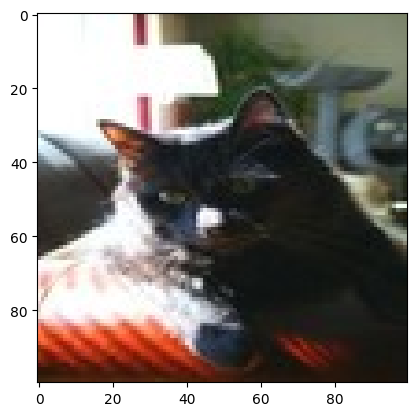

In [7]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\bhask\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model = Sequential()

# ✅ Proper Input Layer
model.add(Input(shape=(100, 100, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.5035 - loss: 0.7203 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.4985 - loss: 0.6934 - val_accuracy: 0.5100 - val_loss: 0.6921
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.5315 - loss: 0.6913 - val_accuracy: 0.5975 - val_loss: 0.6901
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.5690 - loss: 0.6882 - val_accuracy: 0.5450 - val_loss: 0.6838
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.5870 - loss: 0.6713 - val_accuracy: 0.6350 - val_loss: 0.6444
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5945 - loss: 0.6707 - val_accuracy: 0.6275 - val_loss: 0.6525
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.6260 - loss: 0.6519 - val_accuracy: 0.5375 - val_loss: 0.6955
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5880 - loss: 0.6692 - val_accuracy: 0

In [12]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7725 - loss: 0.4952


[0.49518662691116333, 0.7724999785423279]

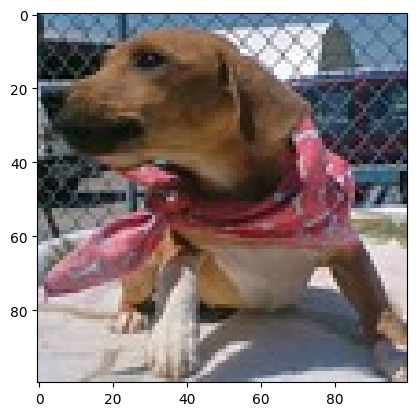

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
our model predicted this image is a: cat


In [13]:
idx2=random.randint(0, len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
if y_pred==0:
    pred='dog'
else:
    pred='cat'
print("our model predicted this image is a:", pred)

In [14]:
model.save('cnn_model.h5')
print("model saved to disk as cnn_model.h5")

model saved to disk as cnn_model.h5
